<a href="https://colab.research.google.com/github/sharonma1218/stats306/blob/main/lab12_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12

In [1]:
library(tidyverse)
install.packages("nycflights13")
install.packages("palmerpenguins")
install.packages("gapminder")
library(nycflights13)
library(palmerpenguins)
library(gapminder)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Functions

This section of the lab is about **functions**, which are covered in [chapter 26](https://r4ds.hadley.nz/functions.html) of the textbook.

### Overview

We've been using functions all semester — e.g., `dplyr` functions like `filter()` and `mutate()`, `ggplot2` functions like `geom_line()` and `geom_bar()`, `stringr` functions like `str_detect()` and `str_sub()`, `forcats` functions like `fct_reorder()` and `fct_collapse()`, and so on. All of the functions we've seen so far are built into `R` (or some `R` package), but we can also define our own functions.

**User-defined functions** are helpful for automating specific tasks that you find yourself repeating often. Instead of copying and pasting the same few lines of code a dozen times and making minor changes to each chunk, you can throw those few lines of code into a function and simply call the function whenever you need it. This makes your code more efficient and easier to read, and it also helps you stay organized as a data scientist.

Here's what a user-defined function looks like:

In [ ]:
name<-function(argument1,argument2,...){
  body
}

In [ ]:
name <- function(arguments) {
    body
}

As you can see, functions have three components:

1. **Name** - You should be smart when naming your functions. Choose something short and descriptive. For example, if you write a function that adds a question mark to the end of a string, you should name it something like `add_question_mark`. If you write a function that converts a birthdate to an age in years, you should name it something like `birthdate_to_age`.
2. **Argument(s)** - The argument(s) are the things that vary across function calls. They are usually either (i) data to be processed by the function or (ii) options that affect how the data is processed.
3. **Body** - The function body is the code that runs each time you call the function. The body is the main part of a function — it executes a task based on the arguments, usually either by modifying the data you pass into the function or by creating something new based on the arguments.

### Vector functions

Let's see an example. The columns of the following data frame contain randomly generated dollar amounts:

In [2]:
set.seed(306)
# create a df 
(df <- tibble(
   col1 = str_c("$", round(rnorm(n = 10, mean = 96, sd = 23), 2)),
   col2 = str_c("$", round(rnorm(n = 10, mean = 96, sd = 23), 2)),
   col3 = str_c("$", round(rnorm(n = 10, mean = 96, sd = 23), 2)),
   col4 = str_c("$", round(rnorm(n = 10, mean = 96, sd = 23), 2)),
   col5 = str_c("$", round(rnorm(n = 10, mean = 96, sd = 23), 2))
))

col1,col2,col3,col4,col5
<chr>,<chr>,<chr>,<chr>,<chr>
$90.24,$90.36,$103.36,$105.97,$94.02
$121.9,$58.29,$102.47,$85.48,$89.31
$116.12,$109,$125.51,$113.92,$112.1
$112.49,$95.1,$81.89,$85.3,$84.95
$104.15,$86.48,$118.33,$98.27,$73.84
$35.21,$122.24,$50.71,$98.25,$84.42
$106.57,$130.49,$62.48,$126.06,$96.87
$90.38,$105.39,$114.48,$78.92,$109.55
$98.33,$77.66,$113.07,$81.08,$73.29


Suppose we want to remove the dollar sign from these quantities, convert each column to [z-scores](https://en.wikipedia.org/wiki/Standard_score), and then round these z-scores to the nearest tenth. One way to do this is to mutate each of the five columns, using the same long line of code for each column. This looks a bit ugly:

In [5]:
parse_number("$1.53")
round(1.256,digits=2)

[1] 1.53

[1] 1.26

In [ ]:
# find rounded z-score w/o dollar sign 
df %>%
  mutate(
      col1 = round((parse_number(col1) - mean(parse_number(col1)))/sd(parse_number(col1)), 1),
      col2 = round((parse_number(col2) - mean(parse_number(col2)))/sd(parse_number(col2)), 1),
      col3 = round((parse_number(col3) - mean(parse_number(col3)))/sd(parse_number(col3)), 1),
      col4 = round((parse_number(col4) - mean(parse_number(col4)))/sd(parse_number(col4)), 1),
      col5 = round((parse_number(col5) - mean(parse_number(col5)))/sd(parse_number(col5)), 1),
  )

col1,col2,col3,col4,col5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.3,-0.1,0.1,0.7,0.3
1.0,-1.4,0.1,-0.6,0.0
0.8,0.6,1.0,1.2,1.6
0.7,0.1,-0.7,-0.7,-0.3
0.3,-0.3,0.7,0.2,-1.2
-2.5,1.2,-1.9,0.2,-0.4
0.4,1.5,-1.4,1.9,0.5
-0.2,0.5,0.6,-1.1,1.5
0.1,-0.6,0.5,-0.9,-1.2


Alternatively, we can throw that long line of code into a simple function called `dollar_to_zscore()` and then apply this function to each column:

In [6]:
dollar_to_zscore = function(x) {
    round((parse_number(x) - mean(parse_number(x)))/sd(parse_number(x)), 1)
}

df %>%
  mutate(
      col1 = dollar_to_zscore(col1),
      col2 = dollar_to_zscore(col2),
      col3 = dollar_to_zscore(col3),
      col4 = dollar_to_zscore(col4),
      col5 = dollar_to_zscore(col5),
  )

# What happens if there are 100s or 1000s of columns? We'll discuss this later. 

col1,col2,col3,col4,col5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.3,-0.1,0.1,0.7,0.3
1.0,-1.4,0.1,-0.6,0.0
0.8,0.6,1.0,1.2,1.6
0.7,0.1,-0.7,-0.7,-0.3
0.3,-0.3,0.7,0.2,-1.2
-2.5,1.2,-1.9,0.2,-0.4
0.4,1.5,-1.4,1.9,0.5
-0.2,0.5,0.6,-1.1,1.5
0.1,-0.6,0.5,-0.9,-1.2


Note that the **name** of our function is `dollar_to_zscore()`. It takes one **argument**, `x`, which is a vector of dollar amounts. The **body** of the function is the line of code that converts the dollar amounts to rounded z-scores.

Since the input and output of `dollar_to_zscore()` are both vectors, we call it a **vector function**. More generally, a vector function is any function that takes in one or more vectors and returns a vector.

There are two important families of vector functions:

1. If a vector function returns a vector of the same length as the input vector, we call it a **mutate function**. Mutate functions work well inside of `mutate()` and `filter()`. Our function `dollar_to_zscore()` is a mutate function.
2. If a vector function returns a single value (i.e., a vector of length one), we call it a **summary function**. Summary functions work well inside of `summarize()`.

Here's an example of a summary function:

In [7]:
proportion_both_positive <- function(x, y) {
    mean(x > 0 & y > 0, na.rm = TRUE)
}

# It's always a good idea to test your function to make sure it's working properly:
proportion_both_positive(c(-1, 20, 13, 9, 0),
                         c(4, 4, 3, 2, 1))
# The function returns 0.6, which is correct
# In practice, it's a good idea to run a bunch of different test cases

[1] 0.6

Of course, user-defined functions are more useful and interesting when they can be applied to real data sets. For example, we can apply `proportion_both_positive()` to the `flights` data set to compute the proportion of flights for each carrier that had both a positive `dep_delay` and a positive `arr_delay`:

In [8]:
flights %>%
  group_by(carrier) %>%
  summarize(prop_both_delays = proportion_both_positive(dep_delay, arr_delay)) %>%
  arrange(desc(prop_both_delays))

carrier,prop_both_delays
<chr>,<dbl>
FL,0.4358491
F9,0.3759178
EV,0.3747192
YV,0.3639706
WN,0.3559701
B6,0.3038302
9E,0.2916402
UA,0.2870875
MQ,0.2766754


### Exercise 1

**The sample variance of a numeric vector `x` is defined as**
$$ \mathbf{S^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2,} $$
**where $\mathbf{\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i}$ is the sample mean.**

**Write a function called `variance()` that computes the sample variance of a numeric vector `x`. Your function should remove missing values in `x`.**

**Test your function on the vector `z = c(-1, 7, 4, 4, NA, 13, 6)`. Your function should produce the same result as the `var()` function that is built into `R` — i.e., `var(z, na.rm = TRUE)` should give you the same thing as `variance(z)`.**

**As another test, use your function to compute the variance of `Sepal.Width` for each `Species` in the `iris` data set. Check to make sure that `variance()` gives you the same result as `var()`.**

In [13]:
# solution 

variance<-function(x){
  x=na.omit(x) # remove missing values in x 
  n=length(x) # n is just the length of the vector
  x_bar=mean(x) # we need x bar 
  
  s2=1/(n-1)*sum((x-x_bar)^2) # now that we defined the parameters, we can make the function
  return(s2) # this line is needed or function won't know what to do 
}

# use var func 
z = c(-1, 7, 4, 4, NA, 13, 6)
variance(z)

# check w r func
var(z, na.rm = TRUE)

[1] 21.1

[1] 21.1

In [9]:
#@title Solution to exercise 1

# Write function
variance <- function(x) {

}

# Test 1
z = c(-1, 7, 4, 4, NA, 13, 6)
variance(z)
var(z, na.rm = TRUE)

# Test 2
iris %>%
  group_by(Species) %>%
  summarize(var_sepal_width = variance(Sepal.Width))

iris %>%
  group_by(Species) %>%
  summarize(var_sepal_width = var(Sepal.Width, na.rm = TRUE))

NULL

[1] 21.1

Species
<fct>
setosa
versicolor
virginica


Species,var_sepal_width
<fct>,<dbl>
setosa,0.14368980
versicolor,0.09846939
virginica,0.10400408


### Data frame functions

A **data frame function** is a function that takes a data frame as input and returns a data frame as output. This type of function is useful for automating general tasks that can be applied to different data frames.

The principles of function writing that we learned for vector functions also apply here, but there's an additional concept called **embracing** that we need to keep in mind when writing a data frame function. To see what embracing is and why we need it, consider the following function:

In [ ]:
group_max <- function(df, group_variable, max_variable) {
    df %>%
      group_by(group_variable) %>%
      summarize(max = max(max_variable))
}

This function takes in a data frame `df`, groups by `group_variable`, and computes the maximum of `max_variable` for each group. This seems like it should work, but look what happens when we try to compute the maximum `Petal.Width` of each `Species` in `iris`:

In [ ]:
iris %>%
  group_max(Species, Petal.Width)

ERROR: [1m[33mError[39m in [1m[1m`group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `group_variable` is not found.


We get an error message :( But fortunately, the error message tells us what went wrong: `group_by()` literally tried to group by a variable called `group_variable`, but there is no column called `group_variable` in `iris`.

This happened because of something called **tidy evaluation**. Tidy evaluation is a characteristic of `dplyr` functions, and it is almost always a good thing — it's what allows us to directly refer to the column names of a data frame inside of functions like `mutate()` and `filter()` without using the `data$variable` syntax that is required in base `R`.

More specifically, in the line `group_by(group_variable)` in the function definition, `group_by()` assumed that we were literally referring to a variable called `group_variable` because it is designed to do tidy evaluation by default. To get around this, we need to modify the function definition by **embracing** `group_variable` in `group_by()`. For the same reason, we need to embrace `max_variable` in `summarize()`. Embracing just means putting double braces around these variables:

In [14]:
group_max <- function(df, group_variable, max_variable) {
    df %>%
      group_by({{group_variable}}) %>%
      summarize(max = max({{max_variable}}))
}

Now our `Petal.Width` example will work as expected:

In [15]:
iris %>%
  group_max(Species, Petal.Width)

Species,max
<fct>,<dbl>
setosa,0.6
versicolor,1.8
virginica,2.5


### Exercise 2

**Write a function called `summarize_by_group()` that takes three arguments: `df`, `group_variable`, and `summary_variable`. This function should take `df`, group by `group_variable`, and then compute the following summary statistics for `summary_variable` for each group:**

- **Minimum**
- **Median**
- **Mean**
- **Maximum**
- **Standard deviation**
- **Proportion of missing values**

**Your function should remove missing values when computing the minimum, median, mean, maximum, and standard deviation.**

**Test your function on the following pairs of summary and group variables:**

- **`dep_delay` for each `origin` in `flights`**
- **`price` for each `cut` in `diamonds`**
- **`tvhours` for each `marital` status in `gss_cat`**

In [16]:
#@title Solution to exercise 2

# Write function
summarize_by_group <- function(df, group_variable, summary_variable) {
    df %>%
      group_by({{group_variable}}) %>%
      summarize(
        min = min({{summary_variable}}, na.rm = TRUE),
        median = median({{summary_variable}}, na.rm = TRUE),
        mean = mean({{summary_variable}}, na.rm = TRUE),
        max = max({{summary_variable}}, na.rm = TRUE),
        sd = sd({{summary_variable}}, na.rm = TRUE),
        prop_missing = mean(is.na({{summary_variable}}))
      )
}

# Test function on flights
flights %>% summarize_by_group(origin, dep_delay)

# Test function on diamonds
diamonds %>% summarize_by_group(cut, price)
# Notice that there are no missing values in this data set

# Test function on gss_cat
gss_cat %>% summarize_by_group(marital, tvhours)

origin,min,median,mean,max,sd,prop_missing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EWR,-25,-1,15.10795,1126,41.32370,0.02680515
JFK,-43,-1,12.11216,1301,39.03507,0.01674170
LGA,-33,-3,10.34688,911,39.99302,0.03012555


cut,min,median,mean,max,sd,prop_missing
<ord>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
Fair,337,3282.0,4358.758,18574,3560.387,0
Good,327,3050.5,3928.864,18788,3681.590,0
Very Good,336,2648.0,3981.760,18818,3935.862,0
Premium,326,3185.0,4584.258,18823,4349.205,0
Ideal,326,1810.0,3457.542,18806,3808.401,0


marital,min,median,mean,max,sd,prop_missing
<fct>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
No answer,1,2,2.555556,4,1.130388,0.4705882
Never married,0,2,3.105175,24,2.860826,0.4470089
Separated,0,3,3.549618,24,3.595378,0.4710633
Divorced,0,2,3.085407,24,2.730915,0.4773869
Widowed,0,3,3.912000,24,2.899770,0.4465966
Married,0,2,2.650425,24,2.113121,0.4887813


### Plot functions

A **plot function** is a function that takes a data frame as input and returns a plot as output. If you want to make a bunch of similar plots (e.g., for different variables in one data frame; with different plot settings for the same variable in one data frame; for similar variables in different data frames), it might be worth writing a plot function.

One thing to keep in mind here is that the `aes()` function in `ggplot2` uses tidy evaluation, so we need to use **embracing** inside `aes()`.

Here's an example of a plot function that creates a histogram of a numeric variable `variable` from a data frame `df` with `n_bins` bins:

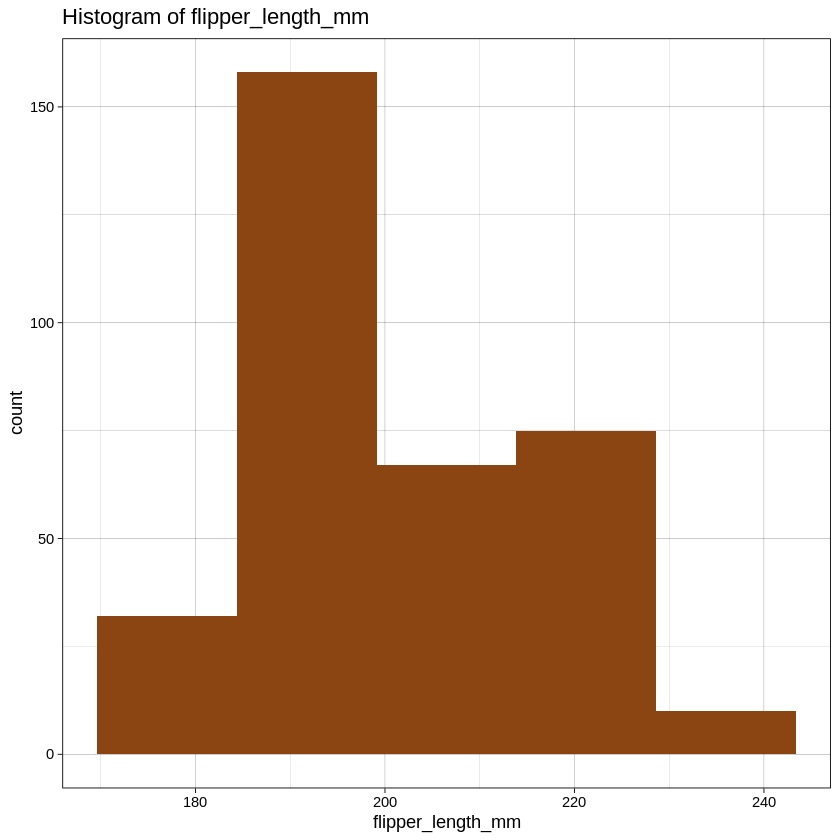

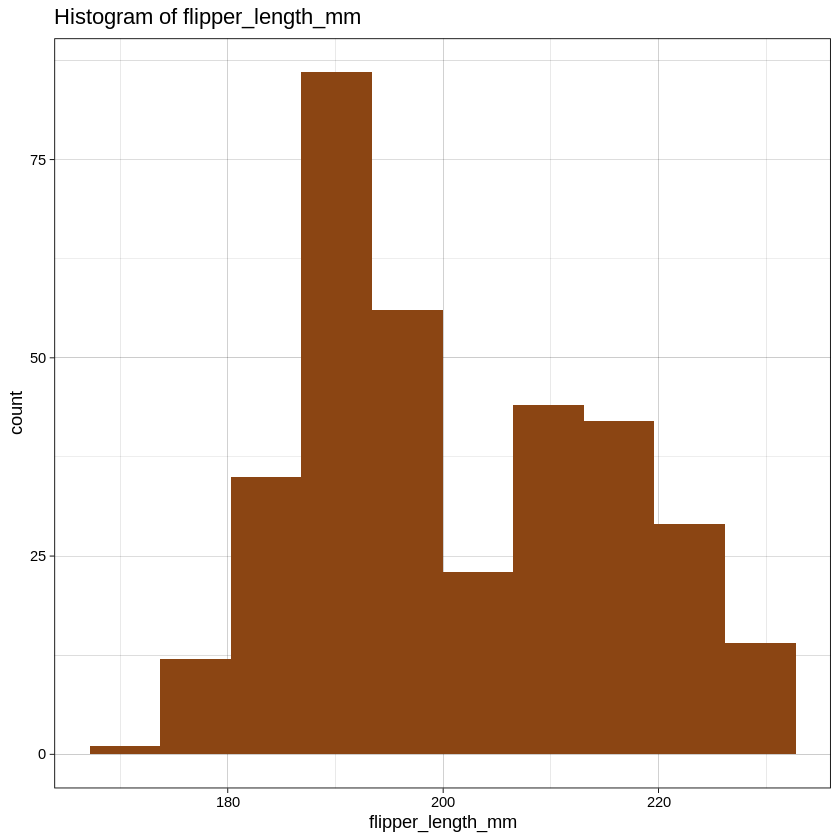

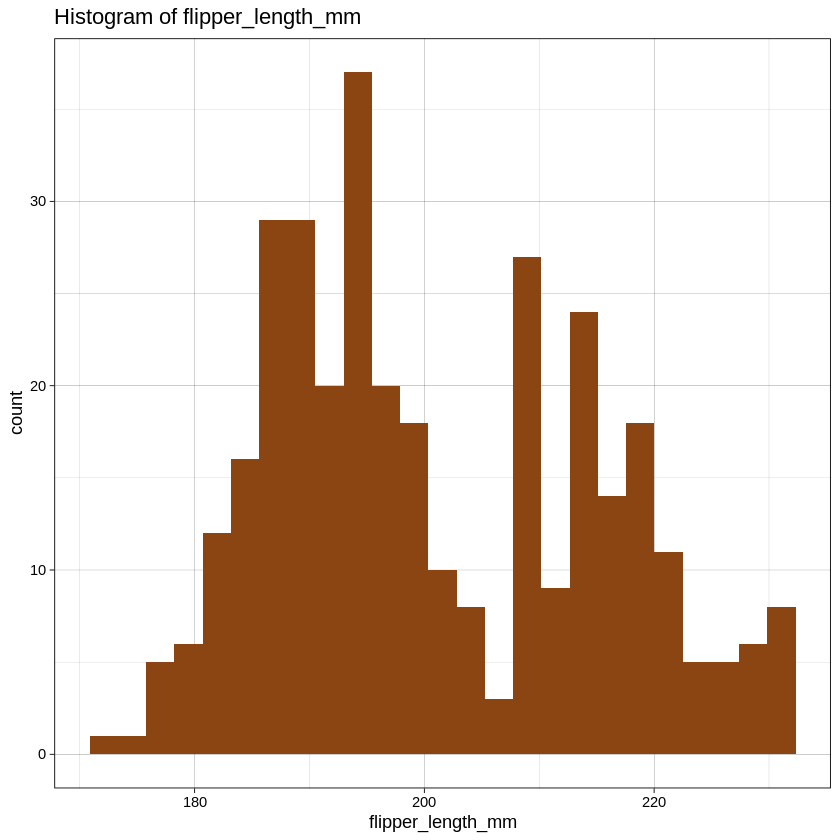

In [17]:
create_histogram <- function(df, variable, n_bins) {
    df %>%
      filter(!is.na({{variable}})) %>%
      ggplot(aes(x = {{variable}})) +
      geom_histogram(bins = n_bins, fill = "saddlebrown") +
      labs(title = rlang::englue("Histogram of {{variable}}")) +
      theme_linedraw()
}

# Histograms of flipper length from the penguins data frame with 5, 10, and 25 bins
penguins %>%
  create_histogram(flipper_length_mm, n_bins = 5)

penguins %>%
  create_histogram(flipper_length_mm, n_bins = 10)

penguins %>%
  create_histogram(flipper_length_mm, n_bins = 25)

One cool trick you might notice in this example is our use of the `englue()` function from the `rlang` package, which allows us to pass the name of `variable` into the labels of our plot.

### Exercise 3

**Write a function called `create_scatterplot` that takes three arguments: `df`, `x_variable`, and `y_variable`. Your function should create a scatterplot with `x_variable` on the x-axis and `y_variable` on the y-axis, and it should use `geom_smooth()` to overlay a smoothing line on the plot.**

**Test your function by creating scatterplots for the following pairs of variables from the `penguins` data frame:**

- **`body_mass_g` and `flipper_length_mm`**
- **`bill_length_mm` and `bill_depth_mm`**
- **`bill_length_mm` and `flipper_length_mm`**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


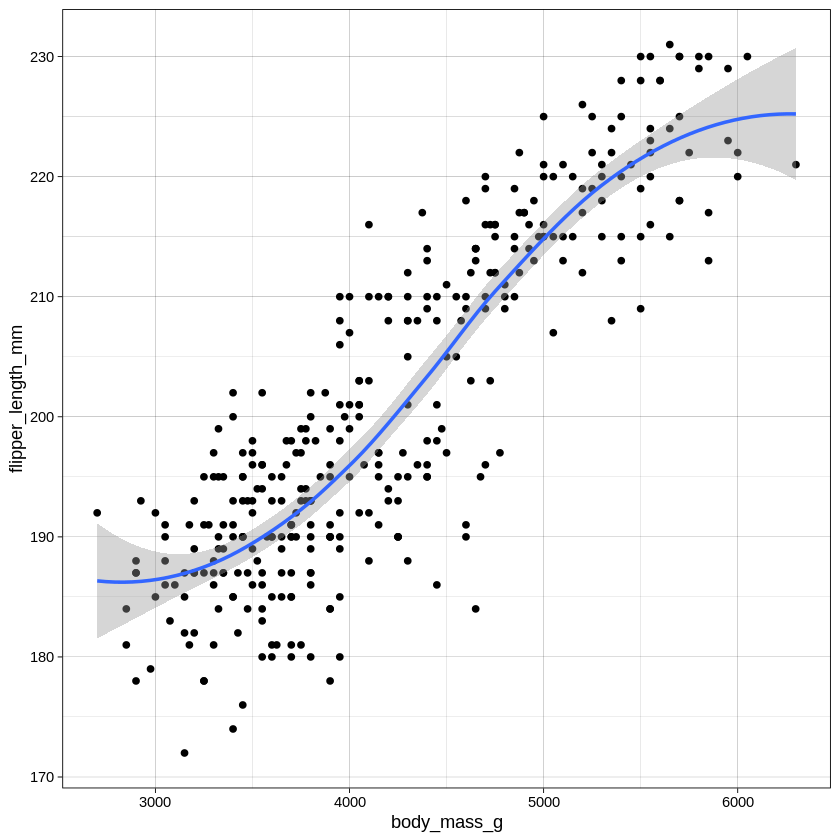

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


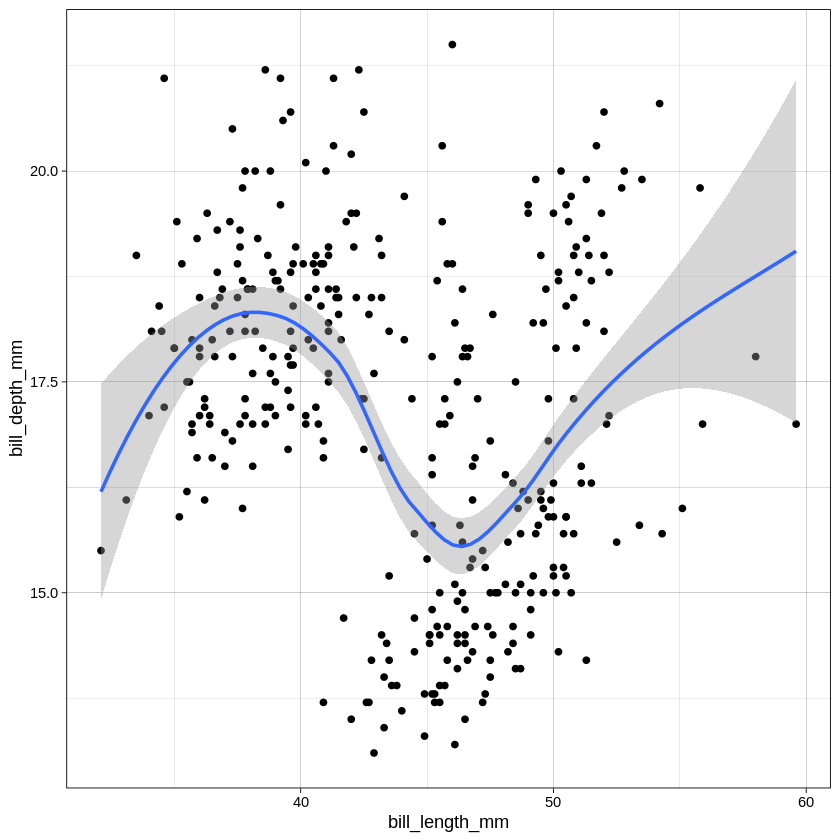

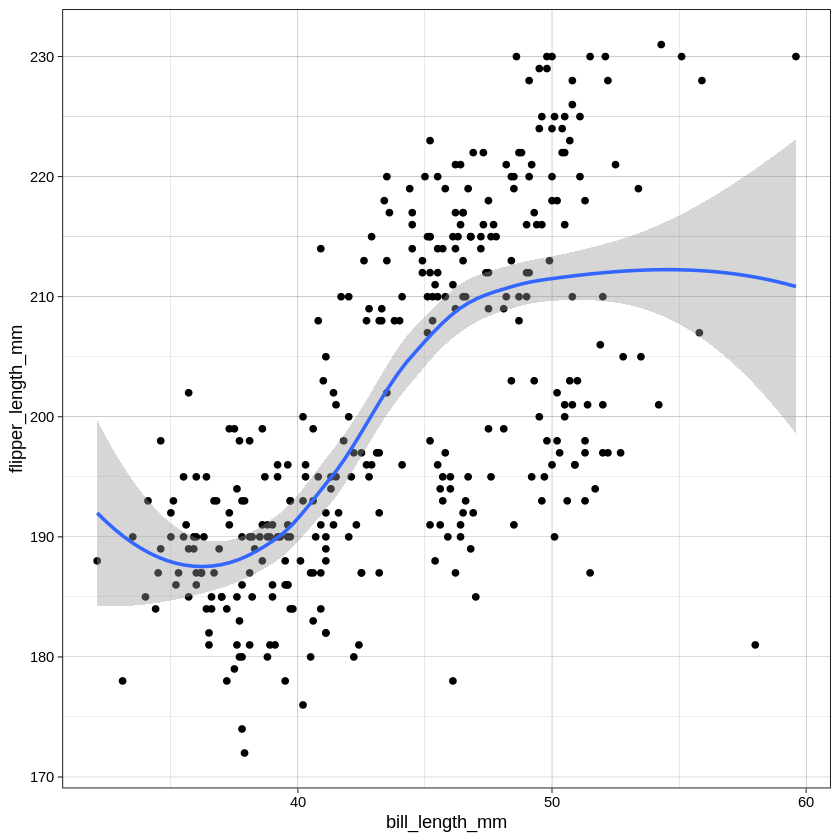

In [20]:
# write function 
create_scatterplot<-function(df,x_variable,y_variable){
  df%>%
    ggplot(aes(x ={{x_variable}},y={{y_variable}}))+
    geom_point()+
    geom_smooth()+ # se=F if you don't want the gray CI, method="lm" if you want a linear reg line instead
    theme_linedraw()
}

# scatterplot of body_mass_g vs flipper_length_mm
penguins %>% create_scatterplot(body_mass_g, flipper_length_mm)

# scatterplot of bill_length_mm vs bill_depth_mm
penguins %>% create_scatterplot(bill_length_mm, bill_depth_mm)

# scatterplot of bill_length_mm vs flipper_length_mm
penguins %>% create_scatterplot(bill_length_mm, flipper_length_mm)

Warning message:
“Ignoring unknown parameters: linewidth”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Ignoring unknown parameters: linewidth”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'



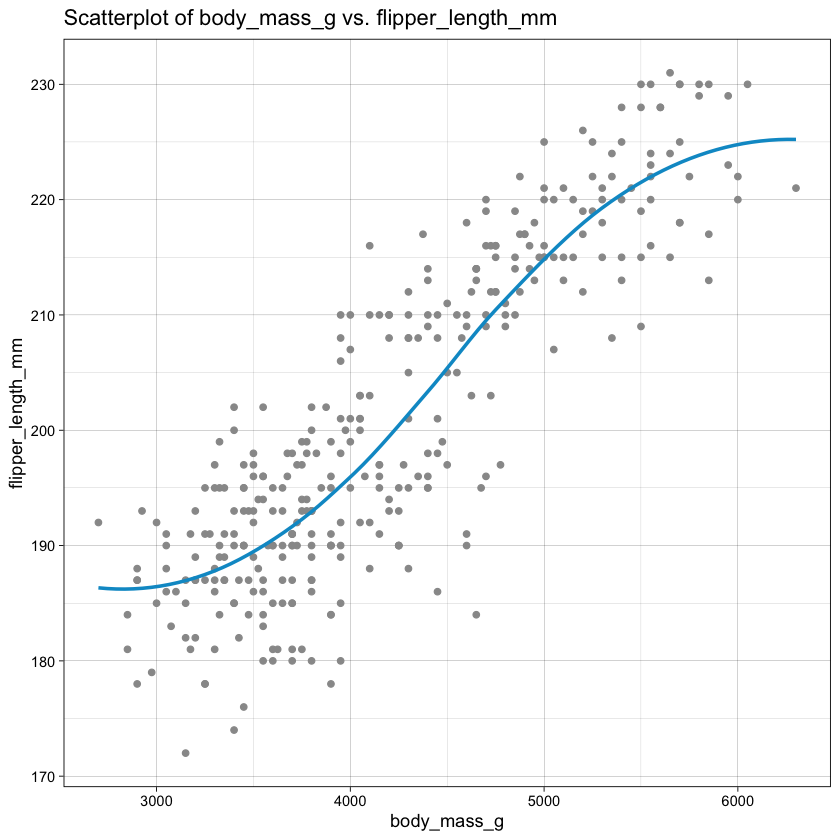

Warning message:
“Ignoring unknown parameters: linewidth”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'



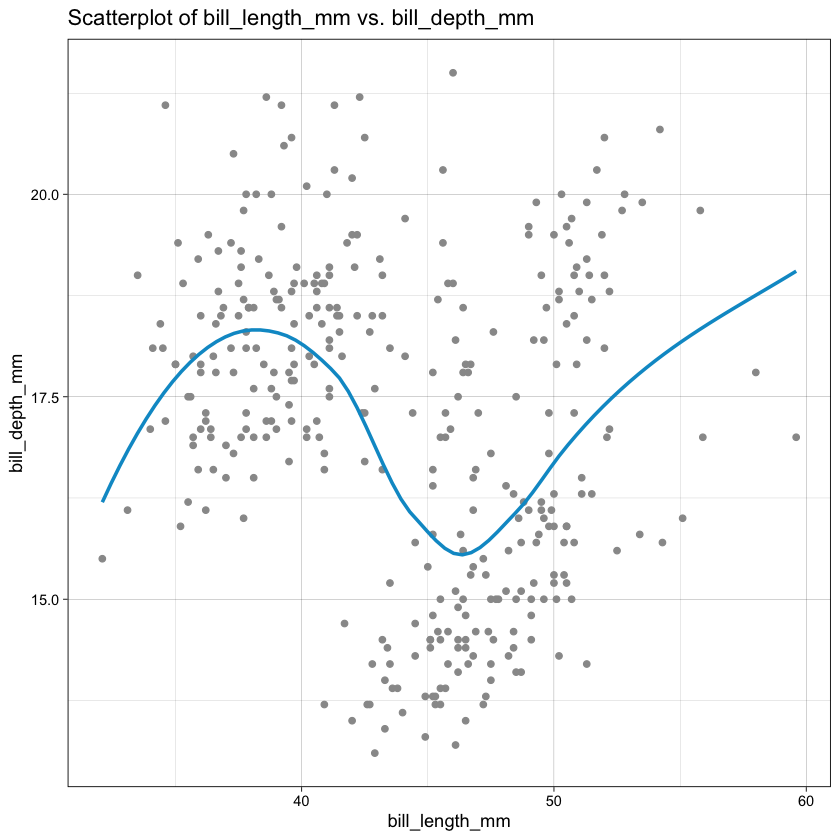

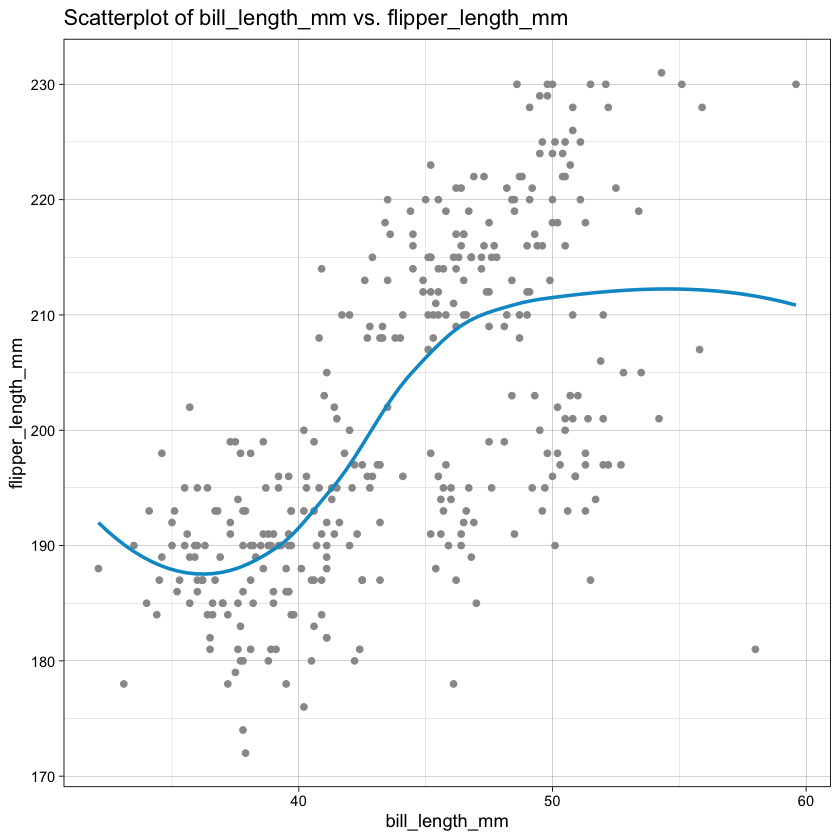

In [ ]:
#@title Solution to exercise 3

# Write function
create_scatterplot <- function(df, x_variable, y_variable) {
    
}

# Create scatterplot of body_mass_g vs. flipper_length_mm
penguins %>% create_scatterplot(body_mass_g, flipper_length_mm)

# Create scatterplot of bill_length_mm vs. bill_depth_mm
penguins %>% create_scatterplot(bill_length_mm, bill_depth_mm)

# Create scatterplot of bill_length_mm vs. flipper_length_mm
penguins %>% create_scatterplot(bill_length_mm, flipper_length_mm)

## Iteration

This section of the lab is about **iteration**, which is covered in [chapter 27](https://r4ds.hadley.nz/iteration.html) of the textbook.

### Overview 

Often when we are programming we find ourselves wanting to repeat the same task over and over. For example, we might be interested in taking the average of each numeric column in a `data.frame`, or applying the same function to each element of a list. If the problem is small enough, copying and pasting code can be an effective way to do this, but often this is inefficient and can become burdensome very quickly. A better approach is using *iterating* tools. 

One group of iterating tools include `for` and `while` loops. These loops are sometimes very useful, but often are slower, take up more lines of code, and are less memory efficient than functions like `across` and `map` (discussed later). 

Consider the previous example of converting dollars to z-scores. We previously wrote a function that will convert columns into z-scores for us, but we copy and pasted this function for each column:

In [21]:
dollar_to_zscore = function(x) {
    round((parse_number(x) - mean(parse_number(x)))/sd(parse_number(x)), 1)
}

set.seed(306)
df <- tibble(
   col1 = str_c("$", round(rnorm(n = 10, mean = 96, sd = 23), 2)),
   col2 = str_c("$", round(rnorm(n = 10, mean = 96, sd = 23), 2)),
   col3 = str_c("$", round(rnorm(n = 10, mean = 96, sd = 23), 2)),
   col4 = str_c("$", round(rnorm(n = 10, mean = 96, sd = 23), 2)),
   col5 = str_c("$", round(rnorm(n = 10, mean = 96, sd = 23), 2))
)

df %>%
  mutate(
      col1 = dollar_to_zscore(col1),
      col2 = dollar_to_zscore(col2),
      col3 = dollar_to_zscore(col3),
      col4 = dollar_to_zscore(col4),
      col5 = dollar_to_zscore(col5),
  )

col1,col2,col3,col4,col5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.3,-0.1,0.1,0.7,0.3
1.0,-1.4,0.1,-0.6,0.0
0.8,0.6,1.0,1.2,1.6
0.7,0.1,-0.7,-0.7,-0.3
0.3,-0.3,0.7,0.2,-1.2
-2.5,1.2,-1.9,0.2,-0.4
0.4,1.5,-1.4,1.9,0.5
-0.2,0.5,0.6,-1.1,1.5
0.1,-0.6,0.5,-0.9,-1.2


A more efficient way of coding would be to use an iterative function like `across` in `dplyr`, which allows us to apply the same function to multiple columns in the `data.frame`: 

In [22]:
df %>%
   mutate(
     across(col1:col5, dollar_to_zscore)
   )

col1,col2,col3,col4,col5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.3,-0.1,0.1,0.7,0.3
1.0,-1.4,0.1,-0.6,0.0
0.8,0.6,1.0,1.2,1.6
0.7,0.1,-0.7,-0.7,-0.3
0.3,-0.3,0.7,0.2,-1.2
-2.5,1.2,-1.9,0.2,-0.4
0.4,1.5,-1.4,1.9,0.5
-0.2,0.5,0.6,-1.1,1.5
0.1,-0.6,0.5,-0.9,-1.2


### `across` function 

The `across` function has three main arguments, that appear in this order:  

- `.cols`: The columns that we want to apply a function on. 
- `.fns`: The functions that we will use on the columns specified in `.cols`
- `.names`: A glue specification that describes how to name the output columns. 

The `across` function is typically used inside of a `summarize` or `mutate` function. 

#### `.cols` argument

The first argument selects the columns to transform. Column selection is done the same way as the `select` function of `dplyr`, which means that we can use functions like `starts_with` or `ends_with`. Other useful selectors are `everything()` (which selects all of the columns), and `where()`, which can be used to select columns of a particular type (e.g., `where(is.numeric)`). 

Here is an example using the `iris` dataset: 

In [ ]:
iris %>%
   mutate(across(starts_with("Sepal"), round)) %>% 
   slice_head(n = 5)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,4,1.4,0.2,setosa
5,3,1.4,0.2,setosa
5,3,1.3,0.2,setosa
5,3,1.5,0.2,setosa
5,4,1.4,0.2,setosa


In [24]:
# starts_with() is the same as:
iris %>%
   mutate(across(c("Sepal.Length","Sepal.Width"), round)) %>% 
   slice_head(n = 5)
# end_with() also exists 

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,4,1.4,0.2,setosa
5,3,1.4,0.2,setosa
5,3,1.3,0.2,setosa
5,3,1.5,0.2,setosa
5,4,1.4,0.2,setosa


#### `.fns` argument

The second argument specifies the function(s) that will be used to transform the selected columns. We can use simple functions like `mean`, `median`, `max`, or create and supply our own function.

**Important:** We are passing the argument of the `.fns` function to `across()`, so `across()` can call the function; we are **not** calling it ourselves. That means the function name should never be followed by `()`. If you forget, you’ll probably get an error: 

In [ ]:
iris %>%
   mutate(across(starts_with("Sepal"), round()))

ERROR: [1m[33mError[39m in [1m[1m`mutate()`:[22m
[1m[22m[33m![39m Problem while computing `..1 = across(starts_with("Sepal"), round())`.
[1mCaused by error:[22m
[33m![39m 0 arguments passed to 'round' which requires 1 or 2 arguments


We can pass user specified functions into the `.fns` argument (like the example above using the `dollar_to_zscore` function). One way to do this is by using *anonymous* functions: 

In [25]:
iris %>%
   summarize(
     across(where(is.numeric), function(x) x^2) # "anon func" b/c disappears once used 
   ) %>%
   slice_head(n = 5)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
26.01,12.25,1.96,0.04
24.01,9.00,1.96,0.04
22.09,10.24,1.69,0.04
21.16,9.61,2.25,0.04
25.00,12.96,1.96,0.04


In [26]:
# same as defining the function & then using it 

square=function(x){
  round(x^2)
}

iris %>%
   summarize(
     across(where(is.numeric), square) 
   ) %>%
   slice_head(n = 5)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
26,12,2,0
24,9,2,0
22,10,2,0
21,10,2,0
25,13,2,0


In the previous example, we creating breifly created a temporary function that didn't have a name (thus an *anonymous* function) that squares the value of the input, and apply this function to each numeric column. 

Note that `across` is part of the `dplyr` package and respects groups created using `group_by`: 

In [ ]:
iris %>%
   group_by(Species) %>%
   summarize(across(where(is.numeric), mean))

Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


**Question:** What if we want to pass additional arguments into a function, like `na.rm` for the `mean` function? 

There are two main solutions: 
- **recommended:** Create an anonymous function that has other input variables specified 
- **less recommended:** You can pass other input arguments as ... arguments in the `across` function. 

We explore this using an example dataset containing independent normal random variables with missing observations. 

In [ ]:
rnorm_na <- function(n, n_na, mean = 0, sd = 1) {
    # This is just a simple function that gives you random normals with a specified number of missing values.
    sample(c(rnorm(n - n_na, mean = mean, sd = sd), rep(NA, n_na)))
}

# Create a dataset with missing values 
df_miss <- tibble(
  a = rnorm_na(5, 1),
  b = rnorm_na(5, 1),
  c = rnorm_na(5, 2),
  d = rnorm(5)
)

df_miss

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
-1.4280438,0.5440007,NA,-1.0409221
-0.1980757,-1.0884813,0.5397552,0.7523635
NA,0.3411558,NA,0.1367945
-0.6936796,NA,-0.8249460,-0.2871675
0.4893179,-0.6048541,-0.1762009,0.6982430


**Recommended approach:** 

In [ ]:
df_miss %>%
  summarize(
    across(a:d, function(x) mean(x, na.rm = TRUE))
  )

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
-0.4576203,-0.2020447,-0.1537972,0.0518623


**Less recommended:**

In [ ]:
df_miss %>%
  summarize(
    across(a:d, mean, na.rm = TRUE)
  )

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
-0.4576203,-0.2020447,-0.1537972,0.0518623


The second approach may seem natural, but the official documentation highly discourages this approach: 

> Using these `...` is strongly discouraged because of issues of timing of evaluation.

#### More than one `.fns`

We can apply more than one function at a time. This is done by passing a list into the `.fns` argument: 

In [27]:
iris %>%
   summarize(across(where(is.numeric), list(mean, median, min, max, sd)))

Sepal.Length_1,Sepal.Length_2,Sepal.Length_3,Sepal.Length_4,Sepal.Length_5,Sepal.Width_1,Sepal.Width_2,Sepal.Width_3,Sepal.Width_4,Sepal.Width_5,Petal.Length_1,Petal.Length_2,Petal.Length_3,Petal.Length_4,Petal.Length_5,Petal.Width_1,Petal.Width_2,Petal.Width_3,Petal.Width_4,Petal.Width_5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.843333,5.8,4.3,7.9,0.8280661,3.057333,3,2,4.4,0.4358663,3.758,4.35,1,6.9,1.765298,1.199333,1.3,0.1,2.5,0.7622377


Naming the functions results in better output if we are using multiple functions: 

In [28]:
iris %>%
   summarize(across(where(is.numeric), list(my_mean = mean, my_median = median)))

Sepal.Length_my_mean,Sepal.Length_my_median,Sepal.Width_my_mean,Sepal.Width_my_median,Petal.Length_my_mean,Petal.Length_my_median,Petal.Width_my_mean,Petal.Width_my_median
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.843333,5.8,3.057333,3,3.758,4.35,1.199333,1.3


#### `.names` argument

By default, the names of the output columns are the same as the input columns (if a single function is used), or you get a specification like `column_function` (if multiple functions are used). We can override this behaviour by using the `.names` argument. This is particularly useful in the `mutate` function, so that we can create new columns rather than overriding existing columns: 

In [29]:
iris %>%
   mutate(across(where(is.numeric), list(rounded = function(x) round(x, 0)), .names = "{.col}_{.fn}")) %>%
   slice_head(n = 5)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Length_rounded,Sepal.Width_rounded,Petal.Length_rounded,Petal.Width_rounded
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
5.1,3.5,1.4,0.2,setosa,5,4,1,0
4.9,3.0,1.4,0.2,setosa,5,3,1,0
4.7,3.2,1.3,0.2,setosa,5,3,1,0
4.6,3.1,1.5,0.2,setosa,5,3,2,0
5.0,3.6,1.4,0.2,setosa,5,4,1,0


### Exercise 4

**Recall the gapminder::gapminder dataset contains some demographic information for various countries around the world. Use the `across` function to calulate the average life expectancy, population, and GDP per-capita for each unique combination of continent and year**. 

In [ ]:
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


`summarise()` has grouped output by 'continent'. You can override using the
`.groups` argument.


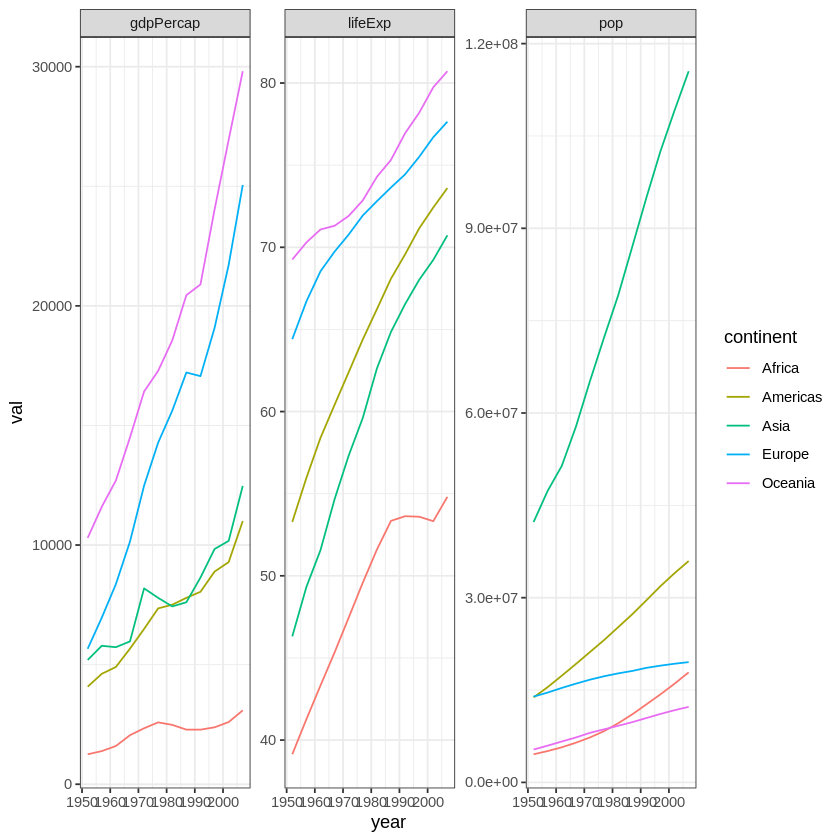

In [33]:
#@title Solution to exercise 4
gapminder%>%
  group_by(continent,year)%>%
  summarize(across(where(is.numeric),function(x) mean(x,na.rm=T)))%>%
  pivot_longer(cols=lifeExp:gdpPercap,names_to="measure",values_to="val")%>%
  ggplot(aes(x=year,y=val,col=continent))+
  geom_line()+
  theme_bw()+
  facet_wrap(~measure,scales="free_y")

### `map` family of functions

The `across` function is useful when we are trying to apply the same function to many columns in a `data.frame` object. The `map` family of functions are similar, but these are used to apply a function to `lists` and `vectors`. These functions are part of the `purrr` package, which is part of the `tidyverse`. 

The most basic of these functions is `map`. 

- The `map` functions are **functionals** (_a function that takes a function as an input and returns a list as output_). 
- They take **lists** or **atomic vectors** and a **function** as arguments. A visualization of how they work is below:

![map1.png](https://d33wubrfki0l68.cloudfront.net/f0494d020aa517ae7b1011cea4c4a9f21702df8b/2577b/diagrams/functionals/map.png)

Consider, for example, the list below, that contains the radius of moons (km) of some planets in our solar system: 

In [34]:
moons <-
  list(
    earth = 1737.1,
    mars = c(11.3, 6.2),
    neptune = 
      c(60.4, 81.4, 156, 174.8, 194, 34.8, 420, 2705.2, 340, 62, 44, 42, 40, 60)
  )
moons

$earth
[1] 1737.1

$mars
[1] 11.3  6.2

$neptune
 [1]   60.4   81.4  156.0  174.8  194.0   34.8  420.0 2705.2  340.0   62.0
[11]   44.0   42.0   40.0   60.0

We could use the `map` function to get the number of moons for each planet in our list, or get the average value of the measurements: 

In [35]:
list1 <- map(moons, length)
list2 <- map(moons, mean)

list1
list2

$earth
[1] 1

$mars
[1] 2

$neptune
[1] 14

$earth
[1] 1737.1

$mars
[1] 8.75

$neptune
[1] 315.3286

### Variants of Map

From the previous example, we see that a list is returned as the output. This is the default behavior of `map`. However, we may want atomic vectors (***intergers, doubles, characters, logical***) to be the outputs for specific tasks. Below gives variations of the `map` functional together with descriptions:

- `map_int()` creates an integer vector.
- `map_dbl()` creates a double vector.
- `map_chr()` creates a character vector.
- `map_lgl()` creates a logical vector.
- `map_df()` creates a dataframe.

So if we wanted a vector of integers rather than a list of the number of moons for each planet, we could use: 

In [36]:
map_int(moons, length)

earth    mars neptune 
      1       2      14

Note that shortcuts also work for all variations: 

In [37]:
map_dbl(moons, function(x) median(x, na.rm = TRUE))

earth    mars neptune 
1737.10    8.75   71.70

Sometimes we want to vectorize using a function that requires more than one input. In this case, we can use another variant of the `map` function, such as `map2`, or `pmap`. 

**map2**: 

![map5.png](https://d33wubrfki0l68.cloudfront.net/f5cddf51ec9c243a7c13732b0ce46b0868bf8a31/501a8/diagrams/functionals/map2.png)

**pmap**: 

![map6.png](https://d33wubrfki0l68.cloudfront.net/e698354d802ce16f83546db63c45a19b8d51f45e/43de7/diagrams/functionals/pmap-3.png)

**`map2`** example: take element-wise product of two vectors (same as `x1 * x2` in `R`, but this makes a good example).

**`pmap`** example: take element wise minimum of an arbitrary number of vectors (equivalent to `pmin`, but this makes a good example). For this function, the inputs need to be a list. 

### Exercise 5

What `map_` variant would you use to complete the following tasks? Implement the codes.

1. **Find the data type for each column of `mtcars`**
2. **Verify which columns of `nycflights13::flights` are numeric.**
3. **Compute the mean of all columns in `mtcars`**
4. **Find the length of unique values in all columns of `mtcars`.**

In [39]:
#@title Solution to exercise 5

# (1) Character
map_chr(mtcars,typeof)

# (2) Logical
map_lgl(nycflights13::flights,function(x) as.logical(is.numeric(x)))

# (3) Double
map_dbl(mtcars,mean)

# (4) Integer
map_int(mtcars,function(x) length(unique(x)))

mpg      cyl     disp       hp     drat       wt     qsec       vs 
"double" "double" "double" "double" "double" "double" "double" "double" 
      am     gear     carb 
"double" "double" "double"

year          month            day       dep_time sched_dep_time 
          TRUE           TRUE           TRUE           TRUE           TRUE 
     dep_delay       arr_time sched_arr_time      arr_delay        carrier 
          TRUE           TRUE           TRUE           TRUE          FALSE 
        flight        tailnum         origin           dest       air_time 
          TRUE          FALSE          FALSE          FALSE           TRUE 
      distance           hour         minute      time_hour 
          TRUE           TRUE           TRUE          FALSE

mpg        cyl       disp         hp       drat         wt       qsec 
 20.090625   6.187500 230.721875 146.687500   3.596563   3.217250  17.848750 
        vs         am       gear       carb 
  0.437500   0.406250   3.687500   2.812500

mpg  cyl disp   hp drat   wt qsec   vs   am gear carb 
  25    3   27   22   22   29   30    2    2    3    6